## Image Classification with TensorFlow Hub (Easy)
This notebook showcases how to perform image classification using a pre-trained model from TensorFlow Hub.
We'll walk through the entire process step-by-step, including:

Importing required libraries

Loading and preprocessing images

Using a pre-trained model for prediction

Visualizing the results

Perfect for beginners exploring transfer learning and TensorFlow Hub!



In [3]:
# Import required libraries
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import PIL.Image as Image

print("TensorFlow version:", tf.__version__)
print("TensorFlow Hub version:", hub.__version__)

TensorFlow version: 2.18.0
TensorFlow Hub version: 0.16.1


## Loading a Pre-trained Image Classification Model
Instead of using TensorFlow Hub, we'll load a pre-trained model from Keras Applications, which offers seamless integration and higher reliability in Google Colab environments.
These models come with pre-trained weights (e.g., from ImageNet) and are ready for use in transfer learning or direct inference tasks.

In [4]:
# Use a pre-trained model from Keras applications
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

# Create the base model from MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=True)

# Print model summary
base_model.summary()

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

## Image Preprocessing and Prediction
In this step, we’ll load a sample image, preprocess it using functions specific to MobileNetV2, and run it through our pre-trained model to make predictions.
We’ll then display the top predicted classes along with their confidence scores to understand the model’s output.

--2025-04-23 06:25:57--  https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.207, 142.251.10.207, 142.251.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61306 (60K) [image/jpeg]
Saving to: ‘test_image.jpg’

test_image.jpg      100%[===================>]  59.87K  --.-KB/s    in 0.06s   

2025-04-23 06:25:57 (1.06 MB/s) - ‘test_image.jpg’ saved [61306/61306]



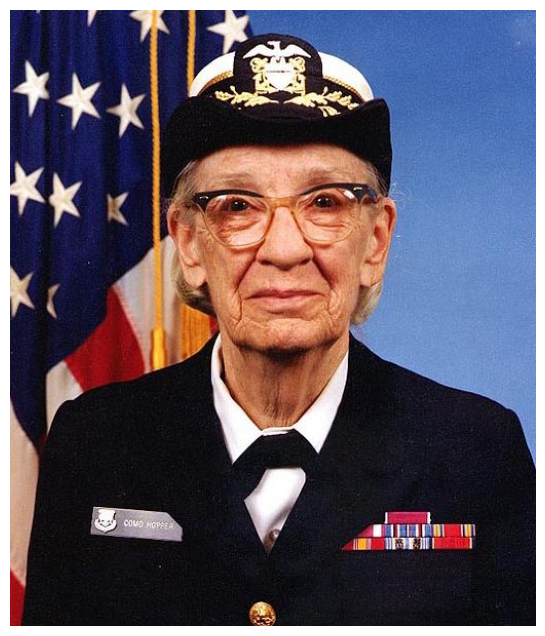

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Top predictions:
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
1: military_uniform (0.88)
2: suit (0.01)
3: Windsor_tie (0.01)
4: bearskin (0.01)
5: ballplayer (0.00)


In [6]:
# Function to load and preprocess images
def load_and_preprocess_image(image_path):
    # Load image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    # Convert to array and expand dimensions
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    # Preprocess input for MobileNetV2
    return preprocess_input(img_array)

# URL of a sample image to classify (uncomment and change if needed)
!wget -O test_image.jpg "https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg"
image_path = "/content/test_image.jpg"  # Update this path if needed

# Visualization of the test image
plt.figure(figsize=(8, 8))
img = tf.keras.preprocessing.image.load_img(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

# Make a prediction
preprocessed_img = load_and_preprocess_image(image_path)
predictions = base_model.predict(preprocessed_img)

# Decode and display top 5 predictions
print("Top predictions:")
for i, (imagenet_id, label, score) in enumerate(decode_predictions(predictions)[0]):
    print(f"{i+1}: {label} ({score:.2f})")

## Processing Multiple Images
Now we’ll extend our workflow to batch process multiple images through the model.
We'll load a set of images, preprocess them appropriately, and display their predicted labels in a grid layout.
This approach is useful for evaluating model performance across a dataset and for visual inspection of predictions at scale.

✅ Downloaded and saved: /content/sample_image_0.jpg
✅ Downloaded and saved: /content/sample_image_1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


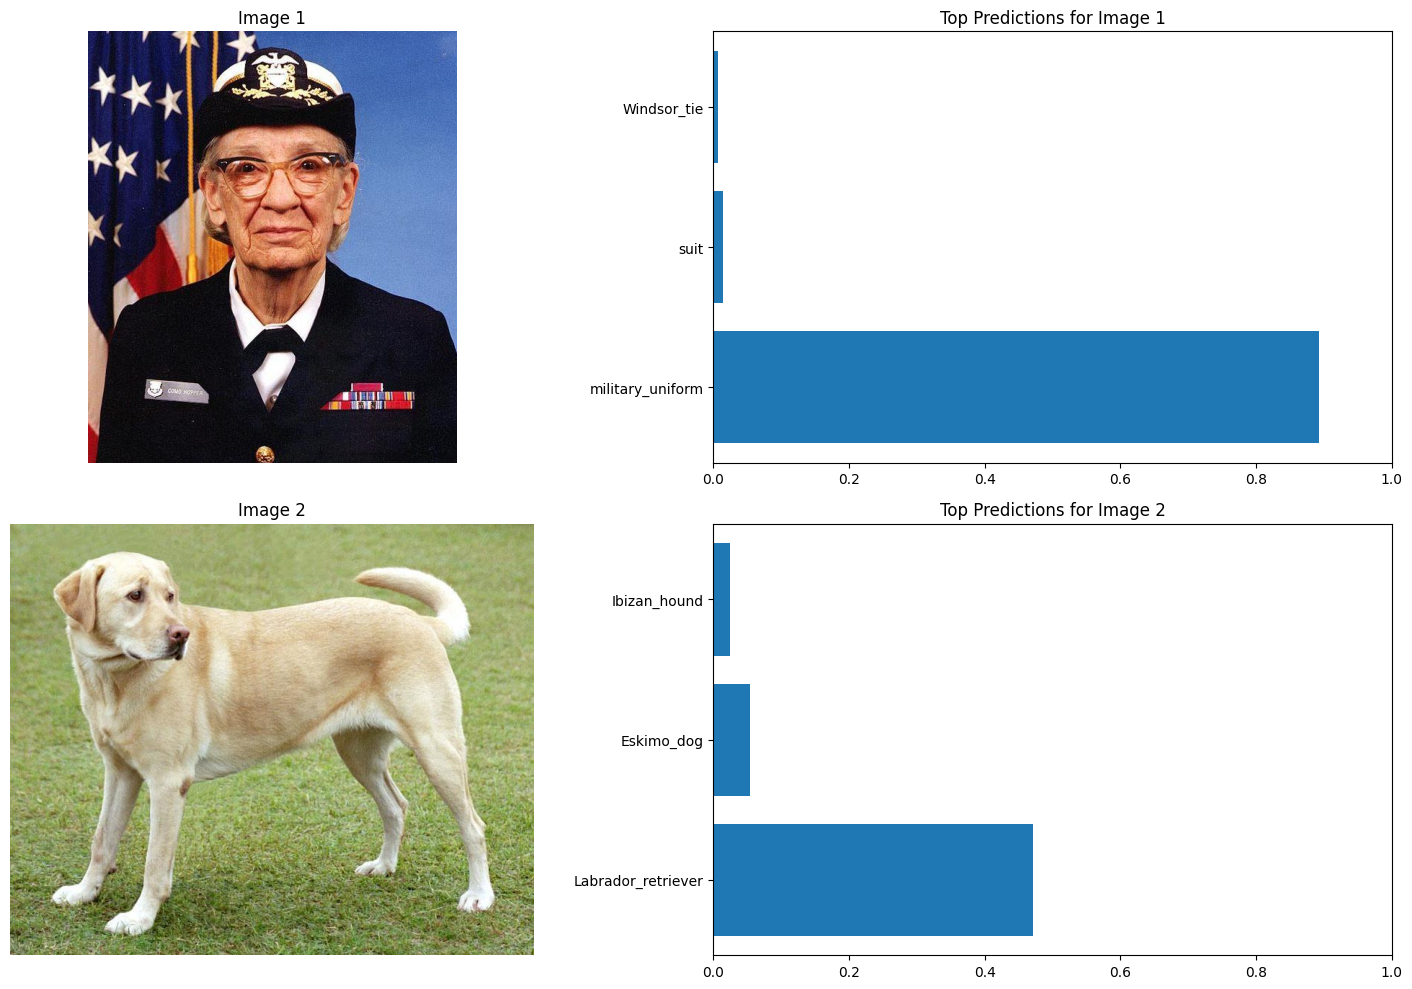

In [7]:
import os
import requests
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from io import BytesIO
import numpy as np
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Load MobileNetV2 model
base_model = MobileNetV2(weights='imagenet')

# Function to load and preprocess image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)

# Download sample images using requests and validate with PIL
sample_images = [
    "https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg",
    "https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg",
]

image_paths = []

for i, image_url in enumerate(sample_images):
    img_path = f"/content/sample_image_{i}.jpg"
    if not os.path.exists(img_path) or os.path.getsize(img_path) == 0:
        response = requests.get(image_url)
        if response.status_code == 200:
            try:
                img = Image.open(BytesIO(response.content))
                img.save(img_path)
                print(f"✅ Downloaded and saved: {img_path}")
                image_paths.append(img_path)
            except Exception as e:
                print(f"❌ Error processing image from {image_url}: {e}")
        else:
            print(f"❌ Failed to download image: {image_url}")
    else:
        image_paths.append(img_path)

# Function to process multiple images and show predictions
def predict_and_plot_multiple(image_paths):
    plt.figure(figsize=(15, 5 * len(image_paths)))

    for i, img_path in enumerate(image_paths):
        preprocessed_img = load_and_preprocess_image(img_path)
        predictions = base_model.predict(preprocessed_img)
        decoded_predictions = decode_predictions(predictions, top=3)[0]

        # Show image
        plt.subplot(len(image_paths), 2, 2 * i + 1)
        img = tf.keras.preprocessing.image.load_img(img_path)
        plt.imshow(img)
        plt.title(f"Image {i + 1}")
        plt.axis('off')

        # Show predictions
        plt.subplot(len(image_paths), 2, 2 * i + 2)
        labels = [p[1] for p in decoded_predictions]
        scores = [p[2] for p in decoded_predictions]
        plt.barh(labels, scores)
        plt.xlim(0, 1)
        plt.title(f"Top Predictions for Image {i + 1}")

    plt.tight_layout()
    plt.show()

# Run prediction and visualization
predict_and_plot_multiple(image_paths)


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Visualizing Intermediate Layer Activations
To better understand how our model interprets images, we’ll visualize the activations of intermediate layers.
This helps us peek inside the network to see:

What kinds of features are detected at different stages

How the image transforms as it passes through the network

Which parts of the image are most influential for the prediction

This is a powerful technique for gaining intuition about model behavior and debugging deep learning models.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


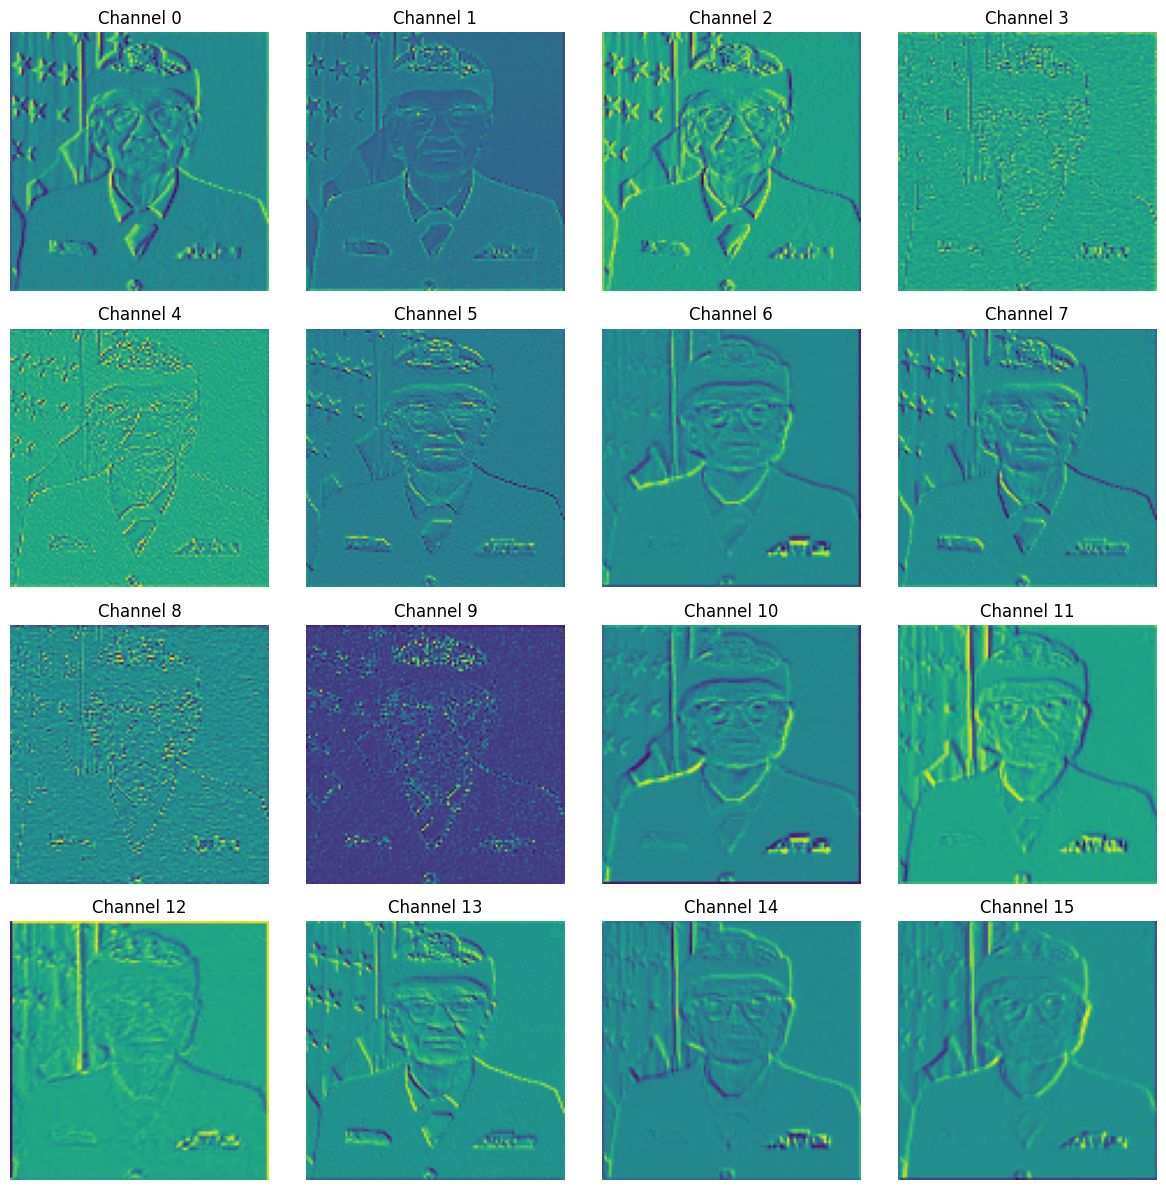

In [9]:
# Create a model that will output the activations of a specific layer
def get_intermediate_model(model, layer_name):
    # Find the specified layer
    selected_layer = None
    for layer in model.layers:
        if layer_name in layer.name:
            selected_layer = layer
            break

    if selected_layer is None:
        print(f"Layer with name containing '{layer_name}' not found!")
        return None

    # Create a model that outputs the activations of the specified layer
    intermediate_model = tf.keras.Model(
        inputs=model.input,
        outputs=selected_layer.output
    )
    return intermediate_model

# Choose a layer to visualize (typically a middle convolutional layer)
layer_name = "block"  # This will match layers like "block_1_", "block_2_", etc.

# Create an intermediate model
intermediate_model = get_intermediate_model(base_model, layer_name)

# Get a sample image
sample_img_path = image_paths[0]  # Using the first image from our previous examples
preprocessed_img = load_and_preprocess_image(sample_img_path)

# Get intermediate activations
activations = intermediate_model.predict(preprocessed_img)

# Plot the activations
def plot_activations(activations, max_channels=16):
    # Determine the number of channels to display
    channels = min(activations.shape[-1], max_channels)

    # Create a grid for visualization
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    axes = axes.flatten()

    # Display activations for each channel
    for i in range(channels):
        if i < len(axes):
            feature_map = activations[0, :, :, i]
            axes[i].imshow(feature_map, cmap='viridis')
            axes[i].set_title(f'Channel {i}')
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Visualize activations
plot_activations(activations)

## Feature Extraction and Transfer Learning
In this section, we’ll implement transfer learning using MobileNetV2 as a feature extractor.
Instead of training the entire network from scratch, we’ll:

Use the pre-trained MobileNetV2 base to extract rich, high-level image features

Freeze the base model to retain its learned weights

Add a custom classification head tailored to our specific task

This approach significantly reduces training time and improves performance, especially when working with limited data.

In [10]:
# Create a model for feature extraction
base_model_features = MobileNetV2(weights='imagenet', include_top=False)

# Freeze the base model to prevent its weights from being updated during training
base_model_features.trainable = False

# Create a new model on top
model = tf.keras.Sequential([
  base_model_features,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(5, activation='softmax')  # 5 classes for example
])

# Compile the model
model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

# Print the model summary
model.summary()

<ipython-input-10-f29acf81cd0f>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_features = MobileNetV2(weights='imagenet', include_top=False)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, None, None,     │     2,257,984 │
│ (Functional)                    │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

## Preparing a Small Dataset for Training
To demonstrate transfer learning, we’ll use a small, well-structured image dataset from TensorFlow Datasets (TFDS).
Specifically, we’ll load the Flowers dataset, which includes images from 5 flower categories.

This dataset is ideal for experimentation and showcases how to:

Load and split datasets using TFDS

Preprocess images to match the input format expected by MobileNetV2

Prepare the data for training and evaluation

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tf_flowers/incomplete.WQOGOB_3.0.1/tf_flowers-train.tfrecord*...:   0%|   …

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
Class names: ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']


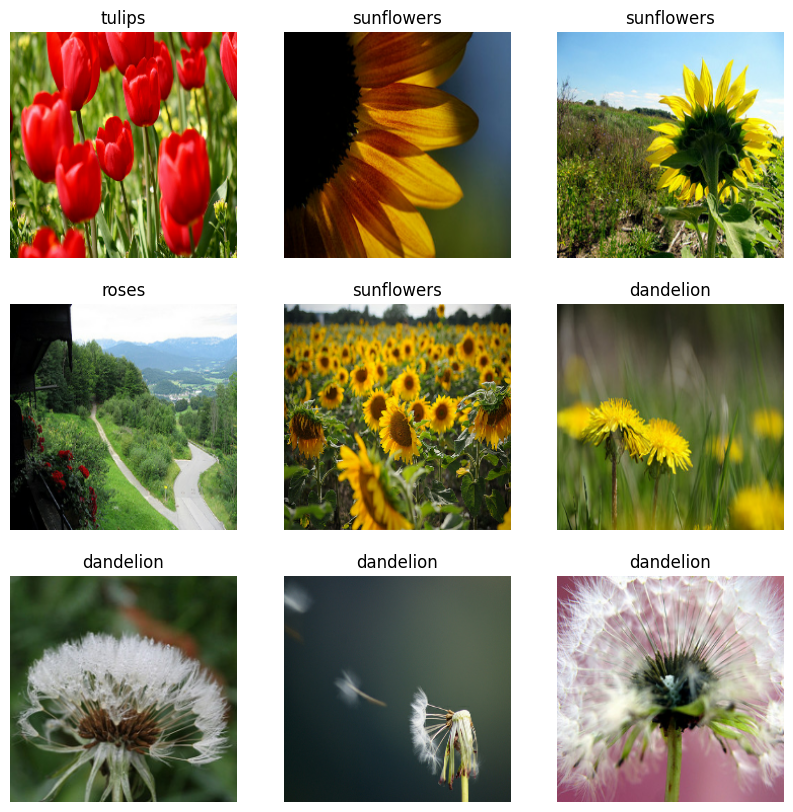

In [11]:
# Import necessary libraries for dataset preparation
import tensorflow_datasets as tfds

# Load the flower dataset
(train_ds, val_ds), dataset_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True,
)

# Get class names
num_classes = dataset_info.features['label'].num_classes
class_names = dataset_info.features['label'].names
print(f"Class names: {class_names}")

# Define image size
img_size = 224
batch_size = 32

# Function to preprocess images
def preprocess_image(image, label):
    image = tf.image.resize(image, (img_size, img_size))
    image = preprocess_input(image)
    return image, tf.one_hot(label, depth=num_classes)

# Create training and validation datasets
train_ds = train_ds.map(preprocess_image).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess_image).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Visualize some training images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        # Convert from preprocessed format back to displayable format
        display_image = (images[i] + 1) / 2.0  # Approximate reverse of preprocessing
        plt.imshow(display_image)
        plt.title(class_names[tf.argmax(labels[i])])
        plt.axis("off")

## Training the Transfer Learning Model
With our dataset prepared and model assembled, we’ll now train the transfer learning model on the flowers dataset.
For demonstration purposes, we’ll train for a small number of epochs, but in a real-world application, longer training may yield better results.

This step will show how well our custom classification head adapts to the new dataset using the powerful features extracted by the pre-trained MobileNetV2 base.

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 31s 231ms/step - accuracy: 0.4104 - loss: 1.4100 - val_accuracy: 0.7807 - val_loss: 0.6722 - learning_rate: 1.0000e-04
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.7895 - loss: 0.6291 - val_accuracy: 0.8488 - val_loss: 0.4718 - learning_rate: 1.0000e-04
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8431 - loss: 0.4507 - val_accuracy: 0.8706 - val_loss: 0.3919 - learning_rate: 1.0000e-04
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8601 - loss: 0.3882 - val_accuracy: 0.8747 - val_loss: 0.3579 - learning_rate: 1.0000e-04
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8832 - loss: 0.3300 - val_accuracy: 0.8883 - val_loss: 0.3283 - learning_rate: 1.0000e-04
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9076 - loss: 0.2945 - val_accuracy: 0.8937 - val_loss: 0.3089 - learning_rate: 1.0000e-04
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.918

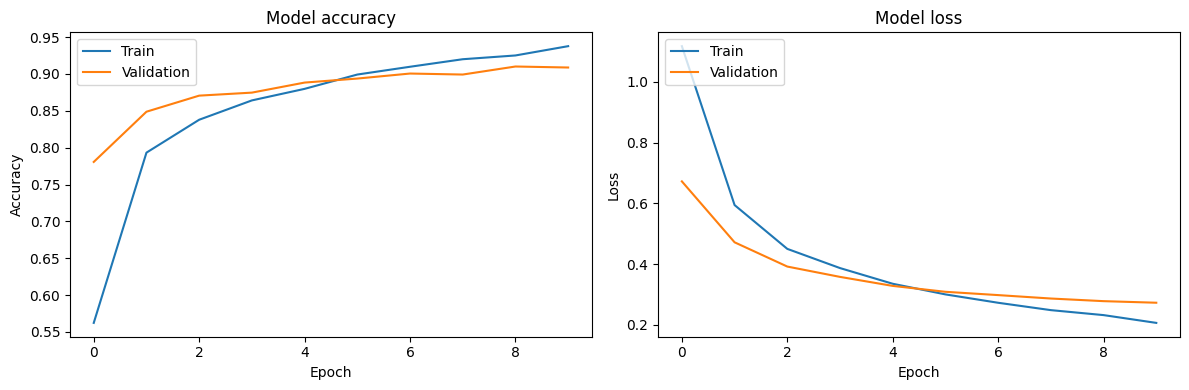

In [12]:
# Define callbacks for training
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2
)

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,  # Start with a small number for demonstration
    callbacks=[early_stopping, reduce_lr]
)

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

## Evaluating Model Performance on New Images
Now that our model is trained, we’ll evaluate its performance on unseen flower images.
We’ll load a few new samples, make predictions using the model, and visualize the results alongside the actual images.

This will help us assess:

How well the model generalizes to new data

The accuracy and confidence of its predictions

Any patterns in misclassifications, if present

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


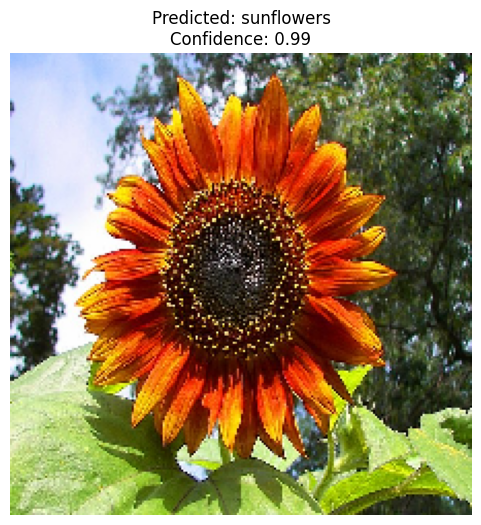

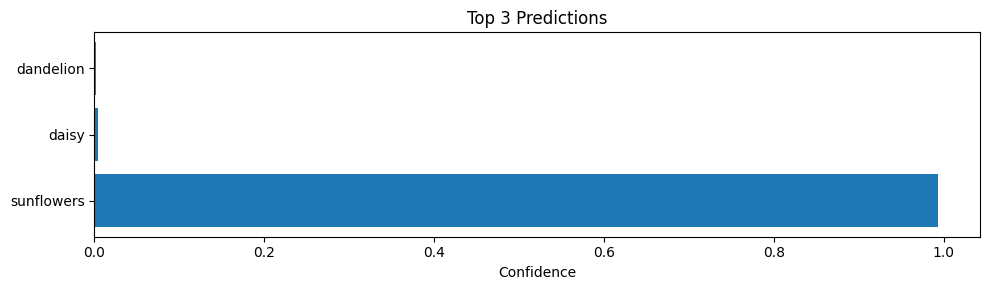

In [13]:
# Function to make predictions on new images
def predict_and_display(model, image_path, class_names):
    # Load and preprocess the image
    img = tf.keras.utils.load_img(image_path, target_size=(img_size, img_size))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array = preprocess_input(img_array)

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = tf.argmax(predictions[0]).numpy()
    confidence = float(predictions[0][predicted_class])

    # Display the image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Predicted: {class_names[predicted_class]}\nConfidence: {confidence:.2f}")
    plt.axis('off')
    plt.show()

    # Show top 3 predictions
    top_indices = tf.argsort(predictions[0], direction='DESCENDING')[:3].numpy()
    plt.figure(figsize=(10, 3))
    plt.barh(range(3), [predictions[0][i] for i in top_indices])
    plt.yticks(range(3), [class_names[i] for i in top_indices])
    plt.xlabel('Confidence')
    plt.title('Top 3 Predictions')
    plt.tight_layout()
    plt.show()

# Download a test image for prediction if needed
test_image_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
test_image_path = "/content/test_flower.jpg"
if not os.path.exists(test_image_path):
    !wget -q -O {test_image_path} {test_image_url}

# Make prediction on the test image
predict_and_display(model, test_image_path, class_names)

## Fine-tuning the Model
To further improve performance, we’ll now fine-tune the model by unfreezing the top layers of the pre-trained MobileNetV2 base.
This allows the model to adjust and refine its learned features specifically for the flowers dataset, leading to potentially better accuracy.

Key steps include:

Unfreezing selected layers of the base model

Recompiling the model with a lower learning rate

Training for a few more epochs to adapt pre-trained weights to our task

0 input_layer_2 False
1 Conv1 False
2 bn_Conv1 False
3 Conv1_relu False
4 expanded_conv_depthwise False
5 expanded_conv_depthwise_BN False
6 expanded_conv_depthwise_relu False
7 expanded_conv_project False
8 expanded_conv_project_BN False
9 block_1_expand False
10 block_1_expand_BN False
11 block_1_expand_relu False
12 block_1_pad False
13 block_1_depthwise False
14 block_1_depthwise_BN False
15 block_1_depthwise_relu False
16 block_1_project False
17 block_1_project_BN False
18 block_2_expand False
19 block_2_expand_BN False
20 block_2_expand_relu False
21 block_2_depthwise False
22 block_2_depthwise_BN False
23 block_2_depthwise_relu False
24 block_2_project False
25 block_2_project_BN False
26 block_2_add False
27 block_3_expand False
28 block_3_expand_BN False
29 block_3_expand_relu False
30 block_3_pad False
31 block_3_depthwise False
32 block_3_depthwise_BN False
33 block_3_depthwise_relu False
34 block_3_project False
35 block_3_project_BN False
36 block_4_expand False
37 block_

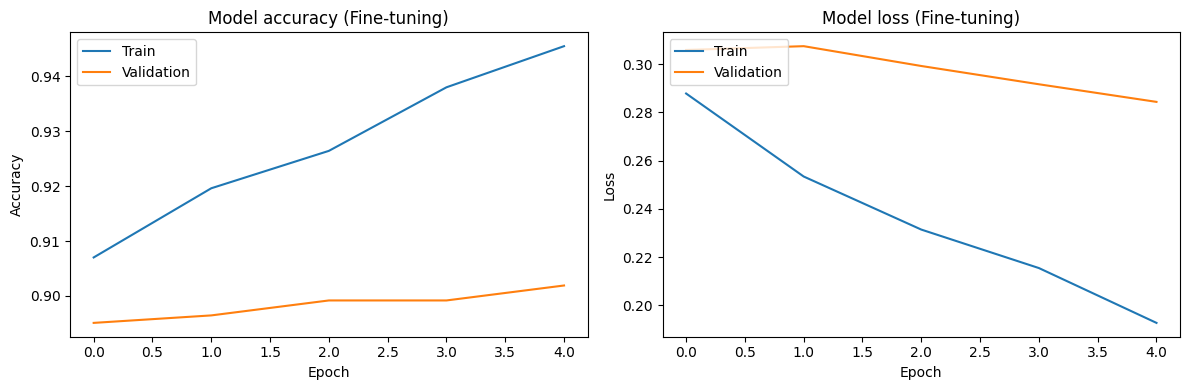

In [14]:
# Unfreeze the top layers of the base model
base_model_features.trainable = True

# Freeze all the layers except the top few
for layer in base_model_features.layers[:-4]:
    layer.trainable = False

# Check which layers are trainable
for i, layer in enumerate(base_model_features.layers):
    print(i, layer.name, layer.trainable)

# Recompile the model with a lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),  # Lower learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Continue training with fine-tuning
fine_tune_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,  # A few more epochs for fine-tuning
    callbacks=[early_stopping, reduce_lr]
)

# Plot the fine-tuning history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(fine_tune_history.history['accuracy'])
plt.plot(fine_tune_history.history['val_accuracy'])
plt.title('Model accuracy (Fine-tuning)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(fine_tune_history.history['loss'])
plt.plot(fine_tune_history.history['val_loss'])
plt.title('Model loss (Fine-tuning)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

## Saving and Loading the Model
With our model successfully trained and fine-tuned, it's time to save it for future use—so we don't need to retrain from scratch.

We'll cover two formats:

Saving the entire model in the recommended .keras format for reuse and further training

Exporting a TensorFlow Lite (TFLite) version for lightweight, mobile-friendly deployment

This ensures our model is both reusable and portable across different platforms.

In [15]:
# Save the entire model with .keras extension (recommended format)
model_save_path = "/content/flower_classifier_model.keras"
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

# Save as SavedModel format for TensorFlow Lite conversion
savedmodel_path = "/content/flower_classifier_savedmodel"
tf.saved_model.save(model, savedmodel_path)
print(f"SavedModel saved to {savedmodel_path}")

# Convert to TensorFlow Lite for mobile deployment
converter = tf.lite.TFLiteConverter.from_saved_model(savedmodel_path)
tflite_model = converter.convert()

# Save the TFLite model
tflite_model_path = "/content/flower_classifier_model.tflite"
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)
print(f"TFLite model saved to {tflite_model_path}")

# Test loading the saved Keras model
loaded_model = tf.keras.models.load_model(model_save_path)
print("Model loaded successfully!")

# Verify the loaded model works the same
img = tf.keras.utils.load_img(test_image_path, target_size=(img_size, img_size))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
img_array = preprocess_input(img_array)

# Compare predictions from original and loaded models
original_pred = model.predict(img_array)
loaded_pred = loaded_model.predict(img_array)

print("Original model prediction:", class_names[tf.argmax(original_pred[0]).numpy()])
print("Loaded model prediction:", class_names[tf.argmax(loaded_pred[0]).numpy()])

Model saved to /content/flower_classifier_model.keras
SavedModel saved to /content/flower_classifier_savedmodel
TFLite model saved to /content/flower_classifier_model.tflite
Model loaded successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Original model prediction: sunflowers
Loaded model prediction: sunflowers
